# **Лабораторна робота №8 Інтерполяція сплайнами**
Варіант 1\
Галатенко Дарія Іванівна 2-16\
Завдання: Побудувати апроксимуючу функцію у вигляді кубічного сплайну для таблично заданої функції та перевірити її роботу.

Для відрізка [0.0, 0.2]:
y(x) = 1.75 + 6.8261 * (x - 0.0) + 0.0 * (x - 0.0)^2 + -54.4024 * (x - 0.0)^3

Для відрізка [0.2, 0.5]:
y(x) = 2.68 + 0.2978 * (x - 0.2) + -32.6415 * (x - 0.2)^2 + 52.1626 * (x - 0.2)^3

Для відрізка [0.5, 0.9]:
y(x) = 1.24 + -5.2032 * (x - 0.5) + 14.3049 * (x - 0.5)^2 + -11.3674 * (x - 0.5)^3

Для відрізка [0.9, 1.5]:
y(x) = 0.72 + 0.7844 * (x - 0.9) + 0.664 * (x - 0.9)^2 + -0.3689 * (x - 0.9)^3



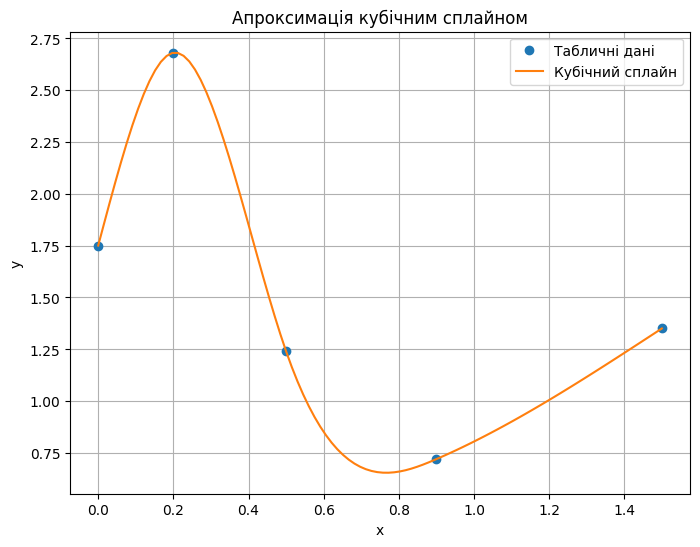

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def cubic_spline_coefficients(x, y):
    n = len(x)
    h = np.diff(x)  # Обчислення різниці між сусідніми значеннями x
    alpha = np.zeros(n)
    for i in range(1, n-1):
        # Обчислення коефіцієнта alpha для кожного вузла, крім першого та останнього
        alpha[i] = 3 * (y[i+1] - y[i]) / h[i] - 3 * (y[i] - y[i-1]) / h[i-1]

    # Ініціалізація векторів l, miu та z
    l = np.zeros(n)
    miu = np.zeros(n)
    z = np.zeros(n)
    l[0] = 1
    miu[0] = 0
    z[0] = 0

    # Обчислення коефіцієнтів l, miu та z
    for i in range(1, n-1):
        l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * miu[i-1]
        miu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
    l[n-1] = 1
    z[n-1] = 0

    # Ініціалізація коефіцієнтів сплайну
    c = np.zeros(n)
    b = np.zeros(n)
    d = np.zeros(n)

    # Обчислення коефіцієнтів сплайну
    for j in range(n-2, -1, -1):
        c[j] = z[j] - miu[j] * c[j+1]
        b[j] = (y[j+1] - y[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3 * h[j])
    
    # Виведення аналітичного вигляду кубічного сплайна для кожного відрізка
    for i in range(n-1):
        print(f'Для відрізка [{x[i]}, {x[i+1]}]:')
        print(f'y(x) = {y[i]} + {round(b[i], 4)} * (x - {x[i]}) + {round(c[i], 4)} * (x - {x[i]})^2 + {round(d[i], 4)} * (x - {x[i]})^3\n')
    
    return y, b, c, d

def cubic_spline_interpolate(x, x_interp, y, b, c, d): #Інтерполяція значень функції на відрізку за допомогою кубічного сплайну
    n = len(x)
    interpolated_values = []
    for x_int in x_interp:
        for i in range(n-1):
            if x[i] <= x_int <= x[i+1]:
                # Інтерполяція на відрізку за формулою кубічного сплайну
                interpolated_value = y[i] + b[i] * (x_int - x[i]) + c[i] * (x_int - x[i]) ** 2 + d[i] * (x_int - x[i]) ** 3
                interpolated_values.append(interpolated_value)
                break
    return interpolated_values

# Таблично задані дані
x = np.array([0, 0.2, 0.5, 0.9, 1.5])
y = np.array([1.75, 2.68, 1.24, 0.72, 1.35])

# Обчислення коефіцієнтів кубічного сплайну
y, b, c, d = cubic_spline_coefficients(x, y)

# Побудова графіка
x_plot = np.linspace(0, 1.5, 100)
y_plot = cubic_spline_interpolate(x, x_plot, y, b, c, d)

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Табличні дані')
plt.plot(x_plot, y_plot, label='Кубічний сплайн')
plt.title('Апроксимація кубічним сплайном')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

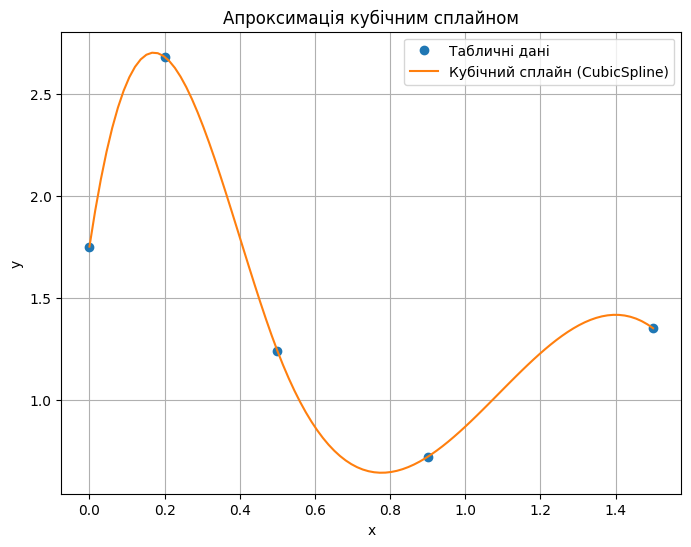

In [9]:
# Побудова кубічного сплайну за допомогою вбудованої функції CubicSpline
cs = CubicSpline(x, y)

# Графік кубічного сплайну
x_plot = np.linspace(0, 1.5, 100)
y_cs = cs(x_plot)

# Графік кубічного сплайну, побудований на основі точок
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Табличні дані')
plt.plot(x_plot, y_cs, label='Кубічний сплайн (CubicSpline)')
plt.title('Апроксимація кубічним сплайном')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# **Висновок**
В лабораторній роботі з інтерполяцією сплайнами я отримав практичні навички у використанні інтерполяційного методу багаточлена Ньютона та зрозумів його застосування для наближення функцій на практиці.